In [131]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [69]:
# df = pd.read_csv('data/taxi_injury_counts.txt',usecols=lambda x: x.upper() in ['COL1', 'COL3'])
data = pd.read_table('data/taxi_injury_counts.txt',sep='\),', engine='python', header = None)

In [70]:
data = data.transpose()

In [71]:
data = data.iloc[1::2, :]

In [73]:
data = data.reset_index(drop=True)

In [93]:
data = data.rename(columns={0: 'AB'})

In [95]:
data['taxi counts'], data['injuries'] = data['AB'].str.split(',', 1).str

In [107]:
data['taxi counts'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
data['injuries'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [108]:
data

,AB,taxi counts,injuries
0,"(15, 10)",15,10
1,"(13, 2)",13,2
2,"(12, 1)",12,1
3,"(30, 3)",30,3
4,"(22, 1)",22,1
5,"(28, 10)",28,10
6,"(8, 2)",8,2
7,"(31, 2)",31,2
8,"(22, 2)",22,2
9,"(19, 6)",19,6


In [112]:
data2 = data

In [114]:
data2 = data2.drop('AB', 1)
data2=data2.astype(float)

In [115]:
data2

,taxi counts,injuries
0,15.0,10.0
1,13.0,2.0
2,12.0,1.0
3,30.0,3.0
4,22.0,1.0
5,28.0,10.0
6,8.0,2.0
7,31.0,2.0
8,22.0,2.0
9,19.0,6.0


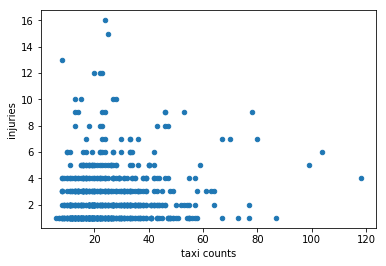

In [134]:
data2.plot.scatter(x='taxi counts', y='injuries', style='o')


In [140]:
import statsmodels.api as sm
data2['injuries'] = 1
model = sm.OLS(data2['taxi counts'], data2[['injuries','taxi counts',]])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            taxi counts   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                      -inf
Date:                Wed, 17 May 2017   Prob (F-statistic):                nan
Time:                        11:07:46   Log-Likelihood:                 22097.
No. Observations:                 673   AIC:                        -4.419e+04
Df Residuals:                     672   BIC:                        -4.419e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
injuries        0.5000   2.57e-17   1.95e+16      0.000         0.500     0.500
taxi counts     0.5000   2.57e-17   1.95e+16      0.000         0.500     0.500
==============================================================================
Omnibus:                        1.008   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.604   Jarque-Bera (JB):              252.375
Skew:                           0.000   Prob(JB):                     1.58e-55
Kurtosis:                       0.000   Cond. No.                     1.39e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.98e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""